In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go 
from sklearn.cluster import KMeans 
from sklearn import datasets

In [2]:
data = pd.read_csv("Spotify_data.csv")
data.head()

,song_ID,song_name,song_artist,song_URI,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,19FsxX4RthRMZGfXkImdCb,Notorious Thugs - 2014 Remaster,The Notorious B.I.G.,spotify:track:19FsxX4RthRMZGfXkImdCb,0.704,0.873,11,-4.057,0,0.1440,...,0.000005,0.2400,0.7420,154.914,audio_features,spotify:track:19FsxX4RthRMZGfXkImdCb,https://api.spotify.com/v1/tracks/19FsxX4RthRM...,https://api.spotify.com/v1/audio-analysis/19Fs...,366880,4
1,2Cdvbe2G4hZsnhNMKyGrie,I Love Rock 'N Roll,Joan Jett & The Blackhearts,spotify:track:2Cdvbe2G4hZsnhNMKyGrie,0.535,0.716,4,-5.025,1,0.0431,...,0.000000,0.6590,0.9010,94.379,audio_features,spotify:track:2Cdvbe2G4hZsnhNMKyGrie,https://api.spotify.com/v1/tracks/2Cdvbe2G4hZs...,https://api.spotify.com/v1/audio-analysis/2Cdv...,175173,4
2,13qqdlSeF8FcxsRyapDMZ0,Changes,Faul & Wad Ad,spotify:track:13qqdlSeF8FcxsRyapDMZ0,0.822,0.704,3,-8.242,0,0.0374,...,0.627000,0.0633,0.2550,125.999,audio_features,spotify:track:13qqdlSeF8FcxsRyapDMZ0,https://api.spotify.com/v1/tracks/13qqdlSeF8Fc...,https://api.spotify.com/v1/audio-analysis/13qq...,345173,4
3,48i055G1OT5KxGGftwFxWy,"Oh, Pretty Woman",Roy Orbison,spotify:track:48i055G1OT5KxGGftwFxWy,0.619,0.603,9,-9.481,1,0.0342,...,0.000000,0.0721,0.9580,127.433,audio_features,spotify:track:48i055G1OT5KxGGftwFxWy,https://api.spotify.com/v1/tracks/48i055G1OT5K...,https://api.spotify.com/v1/audio-analysis/48i0...,178933,4
4,3cWI6Hj9LQ0MfMuhw9uSMc,Lost Without You,Freya Ridings,spotify:track:3cWI6Hj9LQ0MfMuhw9uSMc,0.386,0.136,6,-9.267,1,0.0458,...,0.000000,0.0653,0.0976,67.016,audio_features,spotify:track:3cWI6Hj9LQ0MfMuhw9uSMc,https://api.spotify.com/v1/tracks/3cWI6Hj9LQ0M...,https://api.spotify.com/v1/audio-analysis/3cWI...,225853,3


In [113]:
data.drop(['song_name', 'song_artist', 'song_URI', 'type', 'uri', 'track_href', 'analysis_url', "mode", "time_signature", "duration_ms"], axis = 1, inplace = True) 
data

KeyError: "['song_name' 'song_artist' 'song_URI' 'type' 'track_href' 'analysis_url'\n 'mode' 'time_signature' 'duration_ms'] not found in axis"

In [114]:
data.info

<bound method DataFrame.info of                         danceability  energy  key  loudness  speechiness  \
19FsxX4RthRMZGfXkImdCb         0.704   0.873   11    -4.057       0.1440   
2Cdvbe2G4hZsnhNMKyGrie         0.535   0.716    4    -5.025       0.0431   
13qqdlSeF8FcxsRyapDMZ0         0.822   0.704    3    -8.242       0.0374   
48i055G1OT5KxGGftwFxWy         0.619   0.603    9    -9.481       0.0342   
3cWI6Hj9LQ0MfMuhw9uSMc         0.386   0.136    6    -9.267       0.0458   
...                              ...     ...  ...       ...          ...   
0W6I02J9xcqK8MtSeosEXb         0.912   0.655    8    -6.029       0.1620   
72ahyckBJfTigJCFCviVN7         0.638   0.867    2    -6.469       0.0331   
61X077SWMs5aAGQHhf4pd0         0.832   0.368    4    -8.627       0.1330   
6qCsKKS7Ol63SJW3LOIX5R         0.551   0.756    2    -4.948       0.0652   
5JKnYZOhSP7rOK0jPYcCjV         0.374   0.830   11    -5.203       0.0584   

                        acousticness  instrumentalness 

In [115]:
data.describe()
data

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
19FsxX4RthRMZGfXkImdCb,0.704,0.873,11,-4.057,0.1440,0.12100,0.000005,0.2400,0.7420,154.914
2Cdvbe2G4hZsnhNMKyGrie,0.535,0.716,4,-5.025,0.0431,0.32600,0.000000,0.6590,0.9010,94.379
13qqdlSeF8FcxsRyapDMZ0,0.822,0.704,3,-8.242,0.0374,0.00864,0.627000,0.0633,0.2550,125.999
48i055G1OT5KxGGftwFxWy,0.619,0.603,9,-9.481,0.0342,0.71200,0.000000,0.0721,0.9580,127.433
3cWI6Hj9LQ0MfMuhw9uSMc,0.386,0.136,6,-9.267,0.0458,0.93200,0.000000,0.0653,0.0976,67.016
...,...,...,...,...,...,...,...,...,...,...
0W6I02J9xcqK8MtSeosEXb,0.912,0.655,8,-6.029,0.1620,0.31500,0.000034,0.0894,0.7930,91.942
72ahyckBJfTigJCFCviVN7,0.638,0.867,2,-6.469,0.0331,0.14400,0.000733,0.0846,0.8050,115.692
61X077SWMs5aAGQHhf4pd0,0.832,0.368,4,-8.627,0.1330,0.20000,0.051300,0.3530,0.2000,100.045
6qCsKKS7Ol63SJW3LOIX5R,0.551,0.756,2,-4.948,0.0652,0.05110,0.000000,0.0765,0.6180,175.984


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

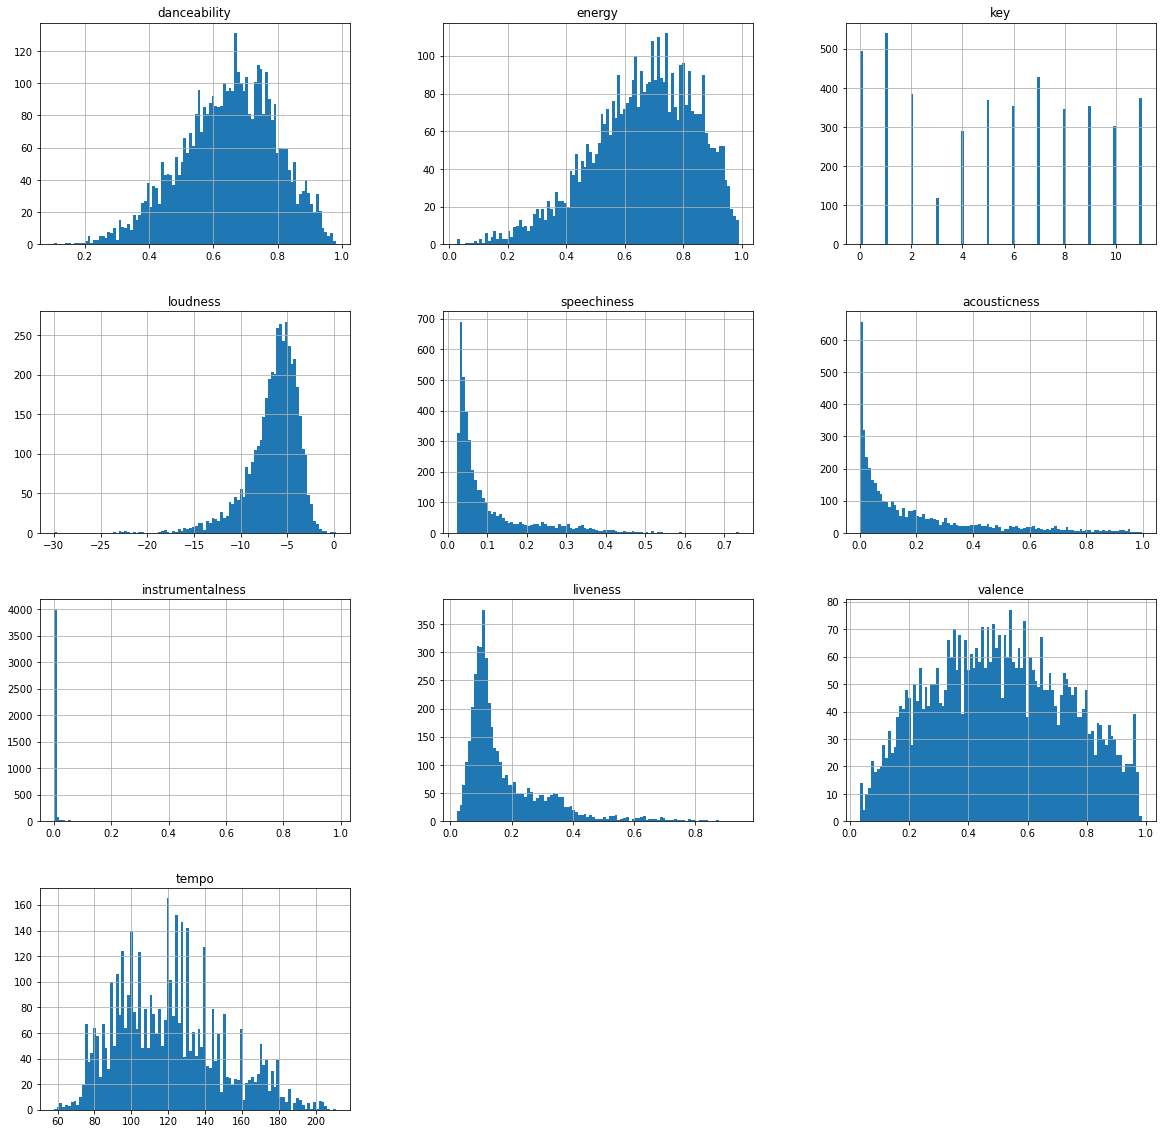

In [6]:
data.hist(bins=100, figsize=(20,20))

## reshape - state to index 

In [116]:
data.index=data.iloc[:,0]

In [117]:
data=data.iloc[:,1:]

In [118]:
data.rename_axis(None,inplace=True)

In [119]:
data.head()

,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0.704,0.873,11,-4.057,0.1440,0.12100,0.000005,0.2400,0.7420,154.914
0.535,0.716,4,-5.025,0.0431,0.32600,0.000000,0.6590,0.9010,94.379
0.822,0.704,3,-8.242,0.0374,0.00864,0.627000,0.0633,0.2550,125.999
0.619,0.603,9,-9.481,0.0342,0.71200,0.000000,0.0721,0.9580,127.433
0.386,0.136,6,-9.267,0.0458,0.93200,0.000000,0.0653,0.0976,67.016


## Visualise to look for patterns

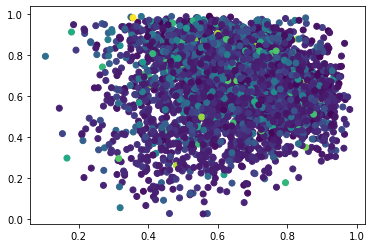

In [28]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.iloc[:,7])

## Apply Clustering 

In [58]:
kmeans=KMeans(n_clusters=5)
#have to set a starting cluster number 

In [59]:
cluster=kmeans.fit(data)

## Explore clusters 

In [60]:
cluster.cluster_centers_

array([[ 6.00105042e-01,  5.94984454e-01,  5.19607843e+00,
        -7.03270308e+00,  1.11018487e-01,  2.75486277e-01,
         1.18116309e-02,  1.83306443e-01,  4.72079552e-01,
         8.29569552e+01],
       [ 6.42196871e-01,  6.60156063e-01,  5.01303781e+00,
        -6.47580965e+00,  1.05569231e-01,  1.75292643e-01,
         2.04757351e-02,  1.85343416e-01,  4.78501304e-01,
         1.43852980e+02],
       [ 5.58528736e-01,  6.99172414e-01,  5.48467433e+00,
        -6.01009195e+00,  1.48826820e-01,  1.71946131e-01,
         1.48978359e-02,  1.82828544e-01,  5.12299617e-01,
         1.73604057e+02],
       [ 6.84672014e-01,  6.67589483e-01,  5.26381462e+00,
        -6.36205704e+00,  9.33562389e-02,  1.77169936e-01,
         1.26463252e-02,  1.73463815e-01,  5.16837255e-01,
         1.01897417e+02],
       [ 6.82000000e-01,  6.83420276e-01,  5.33414436e+00,
        -6.43306894e+00,  7.99746959e-02,  1.84181336e-01,
         2.87675729e-02,  1.75219059e-01,  5.32457502e-01,
         1.

In [61]:
cluster.labels_

array([1, 3, 4, ..., 3, 2, 0])

In [62]:
#bring cluster into data frame
data_c=data.copy()
data_c['cluster']=cluster.labels_

In [112]:
data_c.to_csv('F_no_scale.csv')

In [63]:
data_c.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
19FsxX4RthRMZGfXkImdCb,0.704,0.873,11,-4.057,0.1440,0.12100,0.000005,0.2400,0.7420,154.914,1
2Cdvbe2G4hZsnhNMKyGrie,0.535,0.716,4,-5.025,0.0431,0.32600,0.000000,0.6590,0.9010,94.379,3
13qqdlSeF8FcxsRyapDMZ0,0.822,0.704,3,-8.242,0.0374,0.00864,0.627000,0.0633,0.2550,125.999,4
48i055G1OT5KxGGftwFxWy,0.619,0.603,9,-9.481,0.0342,0.71200,0.000000,0.0721,0.9580,127.433,4
3cWI6Hj9LQ0MfMuhw9uSMc,0.386,0.136,6,-9.267,0.0458,0.93200,0.000000,0.0653,0.0976,67.016,0


## Visually explore clusters 

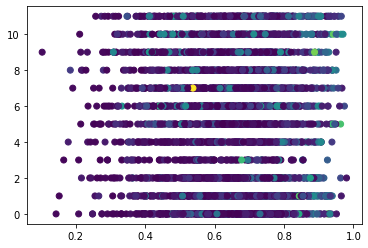

In [64]:
plt.scatter(data_c.iloc[:,0],data_c.iloc[:,2],c=data_c.iloc[:,4]);
# plot 2 numeric values with the cluster to examine it 

## Scaling the data - before clustering 

In [38]:
from sklearn.preprocessing import StandardScaler 

In [39]:
data_scaled=StandardScaler().fit_transform(data)

In [40]:
data_scaled.shape

(4358, 10)

In [42]:
data_scaled_df=pd.DataFrame(data_scaled)

In [43]:
data_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.385682,1.190414,1.590453,0.889902,0.431557,-0.319222,-0.188319,0.451804,1.033112,1.203734
1,-0.767458,0.301928,-0.347413,0.532892,-0.587202,0.573489,-0.188371,3.544304,1.731021,-0.934097
2,1.190832,0.234018,-0.624251,-0.653577,-0.644753,-0.808514,6.121389,-0.852360,-1.104510,0.182583
3,-0.194300,-0.337556,1.036777,-1.110536,-0.677063,2.254397,-0.188371,-0.787410,1.981215,0.233225
4,-1.784132,-2.980377,0.206263,-1.031610,-0.559941,3.212427,-0.188371,-0.837599,-1.795397,-1.900439


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

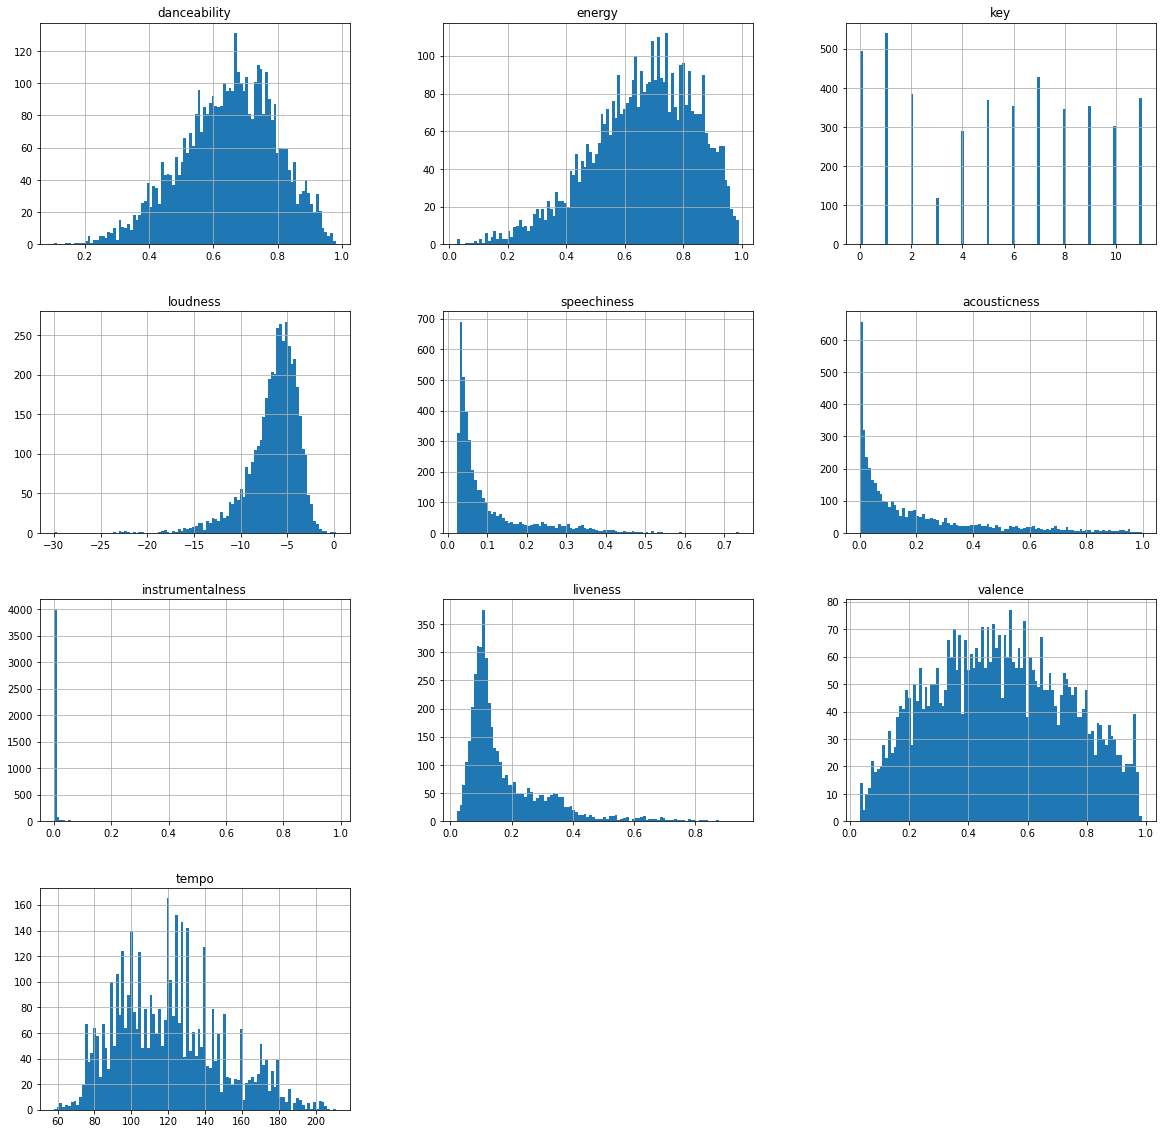

In [44]:
data.hist(bins=100, figsize=(20,20))

### Cluster after scaling

In [104]:
kmeans=KMeans(n_clusters=6)

In [105]:
cluster_scaled=kmeans.fit(data_scaled_df)

In [106]:
cluster_scaled.cluster_centers_

array([[-1.02629744e-01,  5.38833218e-01, -6.54956851e-02,
         3.93179821e-01, -1.25894577e-01, -3.49063055e-01,
        -1.46662125e-01,  1.96312111e+00,  1.59911832e-01,
        -2.14713256e-03],
       [-6.82974801e-01,  3.51575589e-01, -1.39846646e-01,
         3.39677536e-01, -3.67056222e-01, -4.10921550e-01,
        -1.17666387e-01, -2.68815111e-01, -6.10768404e-01,
         3.77054837e-01],
       [ 6.66209394e-01, -2.14024417e-01,  1.27034578e-01,
        -7.47622050e-02,  2.02354673e+00, -1.59129162e-01,
        -1.67029683e-01, -1.15462446e-01, -3.26340606e-02,
         1.97709238e-01],
       [-6.96433378e-02,  1.65230407e-01,  6.78437459e-02,
        -6.58135417e-01, -4.14055917e-01,  7.89674258e-02,
         6.78725192e+00, -5.36393722e-02, -9.89230852e-02,
         1.47563460e-01],
       [ 5.55772377e-01,  2.75375588e-01,  6.73396708e-02,
         2.44302413e-01, -3.21846961e-01, -1.98151875e-01,
        -1.44280198e-01, -3.90819511e-01,  7.87524440e-01,
        -2.

In [107]:
cluster_scaled.labels_

array([4, 0, 3, ..., 5, 1, 1])

In [108]:
data_scaled_df_c=data_scaled_df.copy()
data_scaled_df_c['cluster']=cluster_scaled.labels_

In [109]:
data_scaled_df_c.head()

,0,1,2,3,4,5,6,7,8,9,cluster
0,0.385682,1.190414,1.590453,0.889902,0.431557,-0.319222,-0.188319,0.451804,1.033112,1.203734,4
1,-0.767458,0.301928,-0.347413,0.532892,-0.587202,0.573489,-0.188371,3.544304,1.731021,-0.934097,0
2,1.190832,0.234018,-0.624251,-0.653577,-0.644753,-0.808514,6.121389,-0.852360,-1.104510,0.182583,3
3,-0.194300,-0.337556,1.036777,-1.110536,-0.677063,2.254397,-0.188371,-0.787410,1.981215,0.233225,5
4,-1.784132,-2.980377,0.206263,-1.031610,-0.559941,3.212427,-0.188371,-0.837599,-1.795397,-1.900439,5


In [110]:
data_scaled_df_c['cluster'].value_counts()

4    1372
1    1120
5     642
2     601
0     545
3      78
Name: cluster, dtype: int64

In [111]:
data_scaled_df_c.to_csv('Spotify_API_c.csv')

# Finding Optimal K 

In [76]:
kmeans.inertia_

27983.016640781007

In [81]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(data)
print(kmeans.inertia_)

289333.5761624403


In [82]:
K= range(2,60)

In [83]:
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

print(inertia) 

[1292466.3921034245, 602458.6819837673, 412948.94338788214, 289198.31700167316, 242162.54978557705, 200117.3300562858, 176704.5420468503, 159239.72235340596, 145971.9339257512, 135463.10932557273, 128127.68328023814, 121572.29687303725, 115249.00045314556, 109848.38819041385, 104602.47526285087, 100420.56669927349, 95908.19977477459, 92917.56585196285, 89154.7345785363, 86140.34696811225, 83485.25882855525, 80818.11102840654, 78798.68201184733, 76381.46624809138, 73663.43559390274, 72118.66282037563, 70301.26211800588, 68880.23442195522, 66435.28967592011, 65244.732806101565, 63530.800921859845, 62222.23644933023, 60748.62946289526, 59010.92432341719, 58006.93808765157, 57295.13734734773, 56663.62705573257, 54883.784396751915, 53662.51541764928, 52941.04770090373, 52166.33547865663, 50946.09451750642, 50457.66247247307, 50055.49768956968, 48840.9821193376, 48249.32876160467, 47817.946770183764, 46834.72006545023, 46113.354975717644, 45938.99997946273, 44973.9288661191, 44488.8780009200

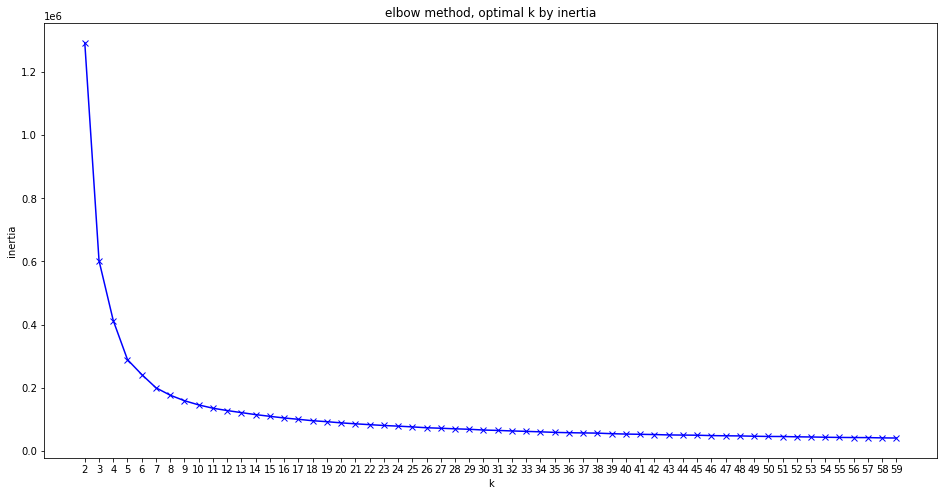

In [84]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method, optimal k by inertia');

#### k=6 according to inertia elbow 

In [85]:
from sklearn.metrics import silhouette_score 

In [88]:
K = range(2, 20)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(data)
    silhouettes.append(silhouette_score(data, kmeans.predict(data)))

Text(0, 0.5, 'silhouette score')

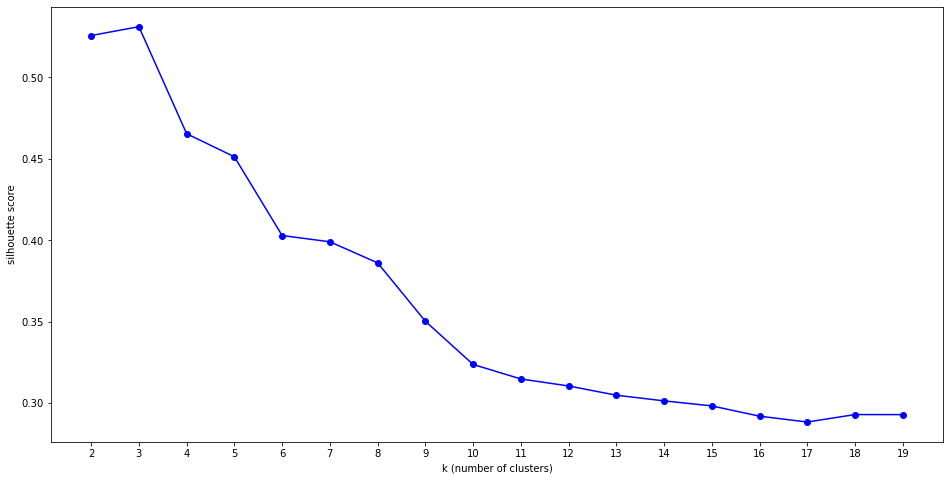

In [89]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

#### k=6 according to silhouette score